In [8]:
from PIL import Image
from numpy import asarray
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import requests
import json

In [9]:
source_image = "images/car_parking1.jpg"
target_image = "images/car_parking.jpg"
image = Image.open(source_image)
orig_data = asarray(image)
print('Original = {0}'.format(orig_data.shape))

Original = (972, 1296, 3)


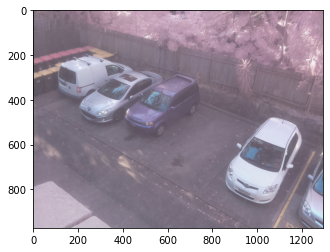

In [10]:
plt.imshow(orig_data)

In [11]:
# 이미지 사이즈 조정 
resize_image = image.resize((150, 150))
resize_data = asarray(resize_image)
print('Resized = {0}'.format(resize_data.shape))
resize_image.save(target_image, "JPEG", quality=95 )
# 이미지를 문자열로 변환
with open(target_image, 'rb') as binary_file:
    binary_file_data = binary_file.read()
    base64_encoded_data = base64.b64encode(binary_file_data)
    image_to_text = base64_encoded_data.decode('utf-8')
# print(image_to_text)

Resized = (150, 150, 3)


In [12]:
accKey = "m3s3i4ig6atyffm4pgib4ugaij7yfsqz"
model_API_Key = "5a8ea1d9527eb761c2b394b81a988f1be5394225c5ba9c2c9955bb59ed3f72d1.94f1d4d570bca979e6d41856ce787ce272174e08d46253b1d4dfcd85f9fa554b"
req_data = '{{"accessKey":"{0}","request":{{"image":"data:image/jpg;base64,{1}"}}}}'.format(accKey, image_to_text)
req_head = 'Bearer {0}'.format(model_API_Key)
# print(req_data)
# print(req_head)

In [13]:
r = requests.post('http://modelservice.hdp.cloudexchange.co.kr/model', data=req_data, 
    headers={'Content-Type': 'application/json', 'Authorization': req_head })

print("http result-{0}".format(r.text))
resdata = json.loads(r.text)

if resdata["success"]:
    resval = resdata["response"]
    parking=json.loads(resval)
    resFree = parking["free"]
    resFull = parking["full"]
    if resFree > resFull:
        print("주자장에 자리가 있습니다. ({0} 확률)".format(resFree))
    else:
        print("주자장에 자리가 없습니다. ({0} 확률)".format(resFull))
else:
    print("Failed-{0}".format(r.text))


http result-{"success":true,"response":"{\"free\":0.9835916758,\"full\":0.0164082646}"}

주자장에 자리가 있습니다. (0.9835916758 확률)
